<a href="https://colab.research.google.com/github/prachi735/1st_DNN.ipynb/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


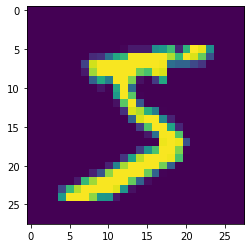

In [250]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [253]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [255]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [256]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(64, 3, 3, activation='relu')) #24
model.add(MaxPooling2D())#12
model.add(Convolution2D(128, 1, 1, activation='relu')) #24
model.add(Convolution2D(128, 3, 3, activation='relu'))#10
model.add(MaxPooling2D())#5
model.add(Convolution2D(10, 1, activation='relu'))#5
model.add(Convolution2D(10, 5))#1

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  


In [257]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_187 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 12, 12, 128)       8320      
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 5, 5, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [259]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2606 - acc: 0.9194
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0712 - acc: 0.9782
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0500 - acc: 0.9846
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0406 - acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0340 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0279 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0227 - acc: 0.9927
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0190 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0175 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0160 - acc: 0.994

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [262]:
print(score)

[0.031672996063345636, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [264]:
print(y_pred[:9])
print(y_test[:9])

[[3.93227161e-12 1.83162055e-10 1.61950436e-06 1.23448137e-06
  5.51953773e-16 7.13747095e-13 1.55934679e-17 9.99996901e-01
  6.21575236e-10 2.18969433e-07]
 [3.60129843e-10 2.04643524e-10 1.00000000e+00 5.63136413e-11
  2.91614618e-15 1.24294493e-15 1.17271928e-10 3.34336525e-15
  5.21327426e-09 1.32936486e-17]
 [7.79761944e-09 9.99990106e-01 1.37164795e-06 8.52986903e-10
  1.82506540e-07 6.76456693e-07 6.43256453e-06 1.21905930e-06
  1.34217295e-08 3.50445749e-11]
 [9.99809444e-01 1.46348539e-16 1.32215490e-07 1.06854423e-12
  7.94374657e-13 3.36047790e-09 1.90359729e-04 7.06190586e-13
  5.94335674e-08 4.10238687e-09]
 [2.64959344e-12 3.89179133e-10 5.33143418e-10 4.44058679e-12
  9.98865247e-01 9.06929462e-11 1.62217138e-08 3.29555983e-09
  1.64694185e-07 1.13461248e-03]
 [8.79119444e-10 9.99996185e-01 7.17146008e-07 1.03196791e-11
  5.88787998e-07 1.02448752e-08 6.70943734e-07 1.83394593e-06
  7.32400052e-09 5.02228988e-11]
 [2.05198016e-17 8.65835459e-11 1.33253026e-08 1.18288452e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

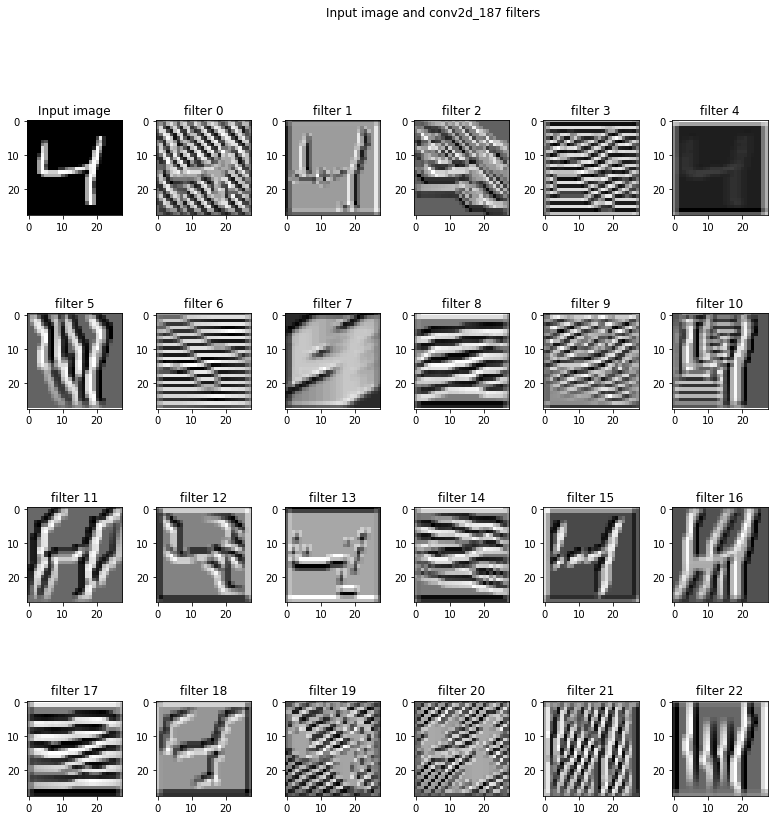

In [268]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_187'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

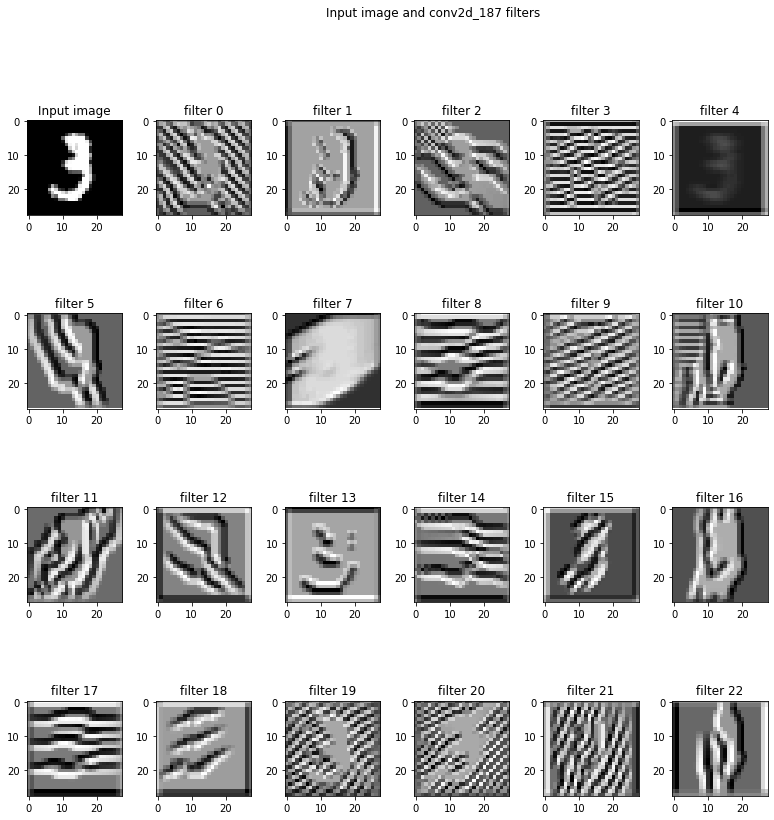

In [270]:
vis_img_in_filter(np.array(X_train[10]).reshape((1, 28, 28, 1)).astype(np.float64))